<a href="https://colab.research.google.com/github/JoGyeongDeok/Project/blob/main/AIFactory/2022_2_4_AI_SPARK_Challenge_of_the_2nd_R%26D_Special_Zone_Artificial_Intelligence_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI SPARK Challenge of the 2nd R&D Special Zone Artificial Intelligence Competition
***https://aifactory.space/competition/detail/1946***

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') s>= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Feb  4 02:55:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |   2154MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# 1. Library & Data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install


Cloning into 'yolov5'...
remote: Enumerating objects: 10839, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 10839 (delta 1), reused 5 (delta 1), pack-reused 10834
Receiving objects: 100% (10839/10839), 10.92 MiB | 14.93 MiB/s, done.
Resolving deltas: 100% (7484/7484), done.
/content/yolov5/yolov5/yolov5


In [ ]:
import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.0-231-g9bc72a3 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 46.0/78.2 GB disk)


In [ ]:
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/yolov5']

In [ ]:
cp -r '/content/yolov5/utils' '/content'

In [ ]:
cp -r '/content/yolov5/models' '/content'

In [ ]:
from models.common import DetectMultiBackend
from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync

In [ ]:
from google.colab.patches import cv2_imshow
from time import sleep
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from tqdm import tqdm
from glob import glob
import os
import json 
import torch
from torch import nn
from torchvision import models
from torch.utils.data import Dataset
from sklearn.metrics import f1_score
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import yaml
import random
from google.colab.patches import cv2_imshow

import datetime
import time

import argparse
import os
import sys
from pathlib import Path

import cv2
import torch
import torch.backends.cudnn as cudnn


In [ ]:
global path
data_path = '/content/drive/MyDrive/조경덕/AIFactory/Data/AI SPARK Challenge of the 2nd R&D Special Zone Artificial Intelligence Competition'
path= '/content'
weight_path = '/content/drive/MyDrive/조경덕/AIFactory/Data/AI SPARK Challenge of the 2nd R&D Special Zone Artificial Intelligence Competition'

In [ ]:
os.mkdir(path+'/images')
os.mkdir(path+'/labels')
os.mkdir(path+'/Label')

os.mkdir(path+'/images/train')
os.mkdir(path+'/images/valid')
os.mkdir(path+'/images/test')

os.mkdir(path+'/labels/train')
os.mkdir(path+'/labels/valid')
os.mkdir(path+'/labels/test')

# zipfile.ZipFile(data_path+'/Training/[원천]돼지_bbox.zip','r').extractall(path+'/images/train/')
# zipfile.ZipFile(data_path+'/Training/[원천]소_bbox.zip','r').extractall(path+'/images/train/')
# zipfile.ZipFile(data_path+'/Training/[라벨]돼지_bbox.zip','r').extractall(path+'/Label/')
# zipfile.ZipFile(data_path+'/Training/[라벨]소_bbox.zip','r').extractall(path+'/Label/')

zipfile.ZipFile(data_path+'/Validation/[원천]돼지_bbox.zip','r').extractall(path+'/images/test/')
zipfile.ZipFile(data_path+'/Validation/[원천]소_bbox.zip','r').extractall(path+'/images/test/')
# os.mkdir(weight_path + "/YoloBestModel")

In [ ]:
#train_index = 객체 이름 
train_index = []
for _ in range(10):
  if len(train_index) != 0 :
    break
  
  train_index = sorted(glob(path+"/Label/*"))
  
  for num in range(len(train_index)):
    train_index[num] = train_index[num][len(path+"/Label/"):-5]

In [ ]:
len(train_index)

0

In [ ]:
# 1개의 voc xml 파일을 Yolo 포맷용 txt 파일로 변경하는 함수 
def json_to_txt(input_xml_file, output_txt_file):
  # 원본 이미지의 너비와 높이 추출. 
  with open(input_xml_file, 'r') as f:
	  json_data = json.load(f)
	
  label_info = json_data['label_info']
  image_name = label_info['image']['file_name'] # 이미지 파일명
  image_width = label_info['image']['width'] # 이미지 넓이
  image_height = label_info['image']['height'] # 이미지 높이
  annotations =  label_info['annotations']

  if json_data['label_info']['image']['file_name'][10] == 'p':
    object_name = 0
  else:
    object_name = 1
  value_str_list = ''
  for annot in annotations:
    x1, y1, x2, y2 = annot['bbox']
    cx_norm, cy_norm, w_norm, h_norm = convert_yolo_coord(object_name, int(image_width), int(image_height), int(x1), int(y1), int(x2), int(y2))
    value_str_list = ('{0} {1} {2} {3} {4}').format(object_name, cx_norm, cy_norm, w_norm, h_norm) + '\n' + value_str_list 
    
  with open(output_txt_file, 'w') as output_fpointer:
    output_fpointer.write(value_str_list)


# object_name과 원본 좌표를 입력하여 Yolo 포맷으로 변환
def convert_yolo_coord(object_name, img_width, img_height, x1, y1, x2, y2):
  # 중심 좌표와 너비, 높이 계산. 
  center_x = (x1 + x2)/2
  center_y = (y1 + y2)/2
  width = x2 - x1
  height = y2 - y1
  # 원본 이미지 기준으로 중심 좌표와 너비 높이를 0-1 사이 값으로 scaling
  center_x_norm = center_x / img_width
  center_y_norm = center_y / img_height
  width_norm = width / img_width
  height_norm = height / img_height

  return round(center_x_norm, 7), round(center_y_norm, 7), round(width_norm, 7), round(height_norm, 7)

In [ ]:
def make_yolo_anno_file(index, output_images_dir, output_labels_dir, task):
  for row in tqdm(index):
    src_image_path = path + '/images/train/' + row + '.jpg'
    src_label_path = path + '/Label/' + row + '.json'
    
    if task == 'train':
      json_to_txt(src_label_path, output_labels_dir + row + ".txt")

    elif task == 'valid':
      json_to_txt(src_label_path, output_labels_dir + row + ".txt")
      shutil.move(src_image_path,output_images_dir)

In [ ]:
train, valid = train_test_split(train_index, test_size = 0.1, random_state = 42)
make_yolo_anno_file(train, path+'/images/train/', path+'/labels/train/', task = 'train')
make_yolo_anno_file(valid, path+'/images/valid/', path+'/labels/valid/', task = 'valid')

In [ ]:
print(len(glob(path+'/images/train/*')))
print(len(glob(path+'/labels/train/*')))

print(len(glob(path+'/images/test/*')))

print(len(glob(path+'/images/valid/*')))
print(len(glob(path+'/labels/valid/*')))

0
0
2058
0
0


In [ ]:
# 데이터 yaml파일 작성
with open(path+"/animal.yaml","w") as f:
  f.write(f'train: {path}/images/train/\n')
  f.write(f'val: {path}/images/valid/\n')  
  f.write(f'test: {path}/images/test/\n')
  f.write(f'nc: 2\n')
  f.write(f'names: [ 0, 1 ]')

In [ ]:
yaml_path = path+"/animal.yaml"
yolov5s_result = weight_path + '/YoloBestModel'

# Yolo Train

In [ ]:
#  10번 미만 epoch는 좋은 성능이 안나옴. 최소 30번 이상 epoch 적용. 
!cd /content/yolov5; python train.py --img 1000 --batch 32 --epochs 200 --data '{yaml_path}' --weights yolov5s6.pt --name Animal_yolov5s_results3 --project='{yolov5s_result}' \
                                      --exist-ok --cache

train: weights=yolov5s6.pt, cfg=, data=/content/animal.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=200, batch_size=32, imgsz=1000, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/AIFactory/Data/AI SPARK Challenge of the 2nd R&D Special Zone Artificial Intelligence Competition/YoloBestModel, name=Animal_yolov5s_results3, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-225-gb73c62e torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,

# Yolo test

In [ ]:
def yolo_detect(
    source = None, 
    nosave = False,
    imgsz=(1024, 1024),
    dnn = False,
    data = None,
    weights = None,
    device = '',
    half = False,  # use FP16 half-precision inference
    visualize = False,
    augment=False,
    conf_thres=0.05,  # confidence threshold
    iou_thres=0.7,  # NMS IOU threshold
    classes=None,  # filter by class: --class 0, or --class 0 2 3
    agnostic_nms=False,
    max_det=1000
):
    result  = pd.DataFrame()
    path_list = []
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    if is_url and is_file:
        source = check_file(source)  # download

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data)
    stride, names, pt, jit, onnx, engine = model.stride, model.names, model.pt, model.jit, model.onnx, model.engine
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Half
    half &= (pt or jit or onnx or engine) and device.type != 'cpu'  # FP16 supported on limited backends with CUDA
    if pt or jit:
        model.model.half() if half else model.model.float()

    # Dataloader
    dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
    bs = 1  # batch_size
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    model.warmup(imgsz=(1, 3, *imgsz), half=half)  # warmup
    dt, seen = [0.0, 0.0, 0.0], 0

    for temp_path, im, im0s, vid_cap, s in tqdm(dataset):
        t1 = time_sync()
        im = torch.from_numpy(im).to(device)
        im = im.half() if half else im.float()  # uint8 to fp16/32
        im /= 255  # 0 - 255 to 0.0 - 1.0
        if len(im.shape) == 3:
            im = im[None]  # expand for batch dim
        t2 = time_sync()
        dt[0] += t2 - t1

        # Inference
        pred = model(im, augment=augment, visualize = False)
        t3 = time_sync()
        dt[1] += t3 - t2

        # NMS
        pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
        dt[2] += time_sync() - t3

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            for _ in range(len(det)):
              path_list.append(temp_path[len(path+'/images/test/'):])
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = temp_path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = temp_path, im0s.copy(), getattr(dataset, 'frame', 0)

            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape)

        result = result.append(pd.DataFrame(np.array(det.to('cpu'))))
    result = pd.concat([pd.DataFrame(path_list).reset_index(drop = True), result.reset_index(drop = True)],axis=1)
    result.columns = ['ImageID', 'XMin', 'YMin', 'XMax', 'YMax', 'Conf', 'LabelName']
    return result

In [ ]:
result = yolo_detect(source = path + '/images/test', data = path + '/animal.yaml', weights = yolov5s_result + '/Animal_yolov5s_results3/weights/best.pt',
                     augment = True, dnn = True, conf_thres = 0.01, iou_thres=0.66, imgsz=(1600, 1600))

YOLOv5 🚀 v6.0-231-g9bc72a3 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 280 layers, 12312052 parameters, 0 gradients, 16.2 GFLOPs
100%|██████████| 2058/2058 [04:40<00:00,  7.35it/s]


In [ ]:
final_result = pd.DataFrame({'ImageID' : result['ImageID'],
                             'LabelName' : result['LabelName'],
                             'Conf' : result['Conf'],
                             'XMin' : result['XMin'],
                             'XMax' : result['XMax'],
                             'YMin' : result['YMin'],
                             'YMax' : result['YMax'],
                             })

In [ ]:
final_result.loc[final_result['LabelName'] == 0 , 'LabelName'] = 'pig'
final_result.loc[final_result['LabelName'] == 1 , 'LabelName'] = 'cow'

In [ ]:
final_result.to_csv(data_path + '/submission/submission.csv', index=False)

# Validation Data 결과 확인

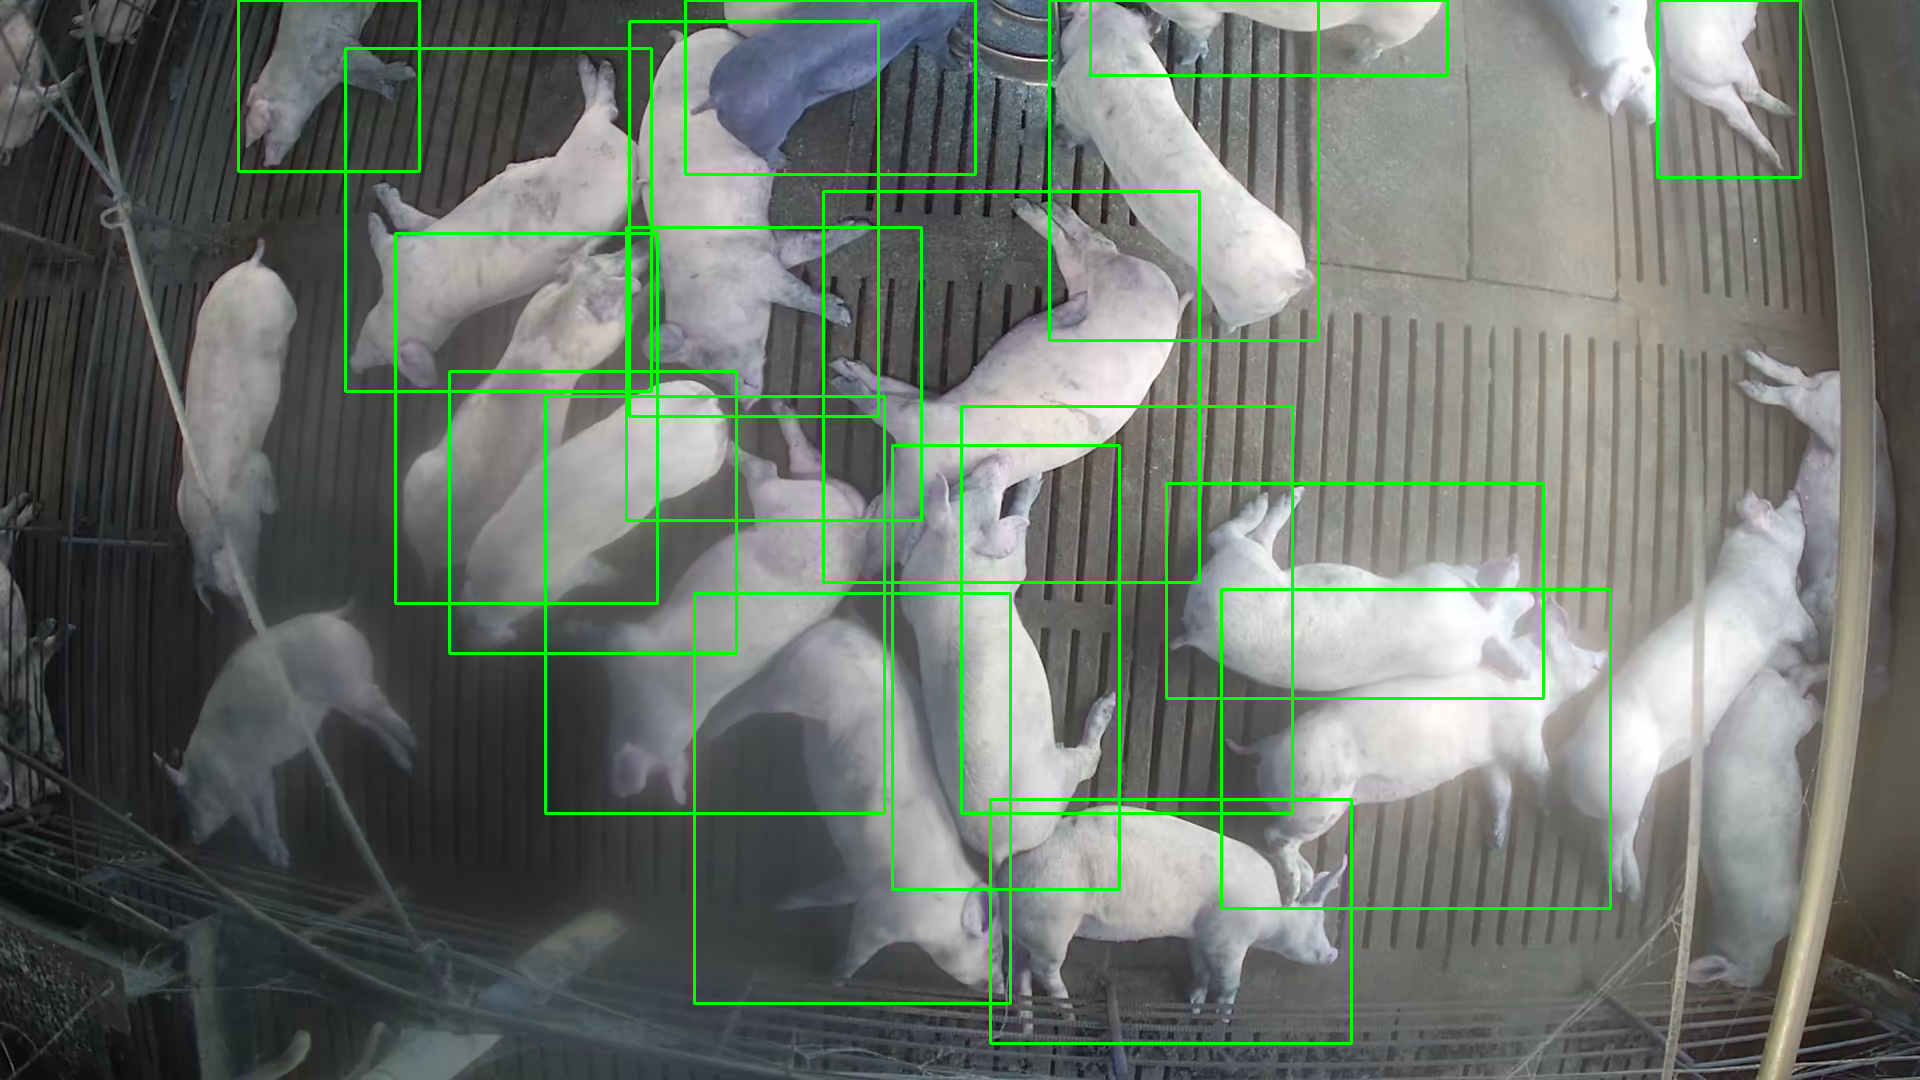

In [ ]:
id = 9500
temp_data = final_result.loc[final_result['ImageID'] == final_result['ImageID'][id]]

img = cv2.imread(path + '/images/test/' + final_result.loc[id,'ImageID'] )
draw_img = img
green_color=(0, 255, 0)


for i in range(temp_data.shape[0]):
  x1 = temp_data['XMin'].iloc[i]
  y1 = temp_data['YMin'].iloc[i]
  x2 = temp_data['XMax'].iloc[i]
  y2 = temp_data['YMax'].iloc[i]
  cv2.rectangle(draw_img, (int(x1), int(y1)), (int(x2), int(y2)), color=green_color, thickness=2)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
cv2_imshow(img_rgb)